In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
dpi = 200


In [2]:
original_warp_params = np.asarray(pickle.load(open('output_kalman_2/warp_params.pkl', 'rb')))
original_frame_nums = pickle.load(open('output_kalman_nn/frame_nums.pkl', 'rb'))
detected_frame_nums = pickle.load(open('output_kalman_nn/detected_frame_numbers.pkl', 'rb'))
kalman_filtered_warp = pickle.load(open('output_kalman_nn/kalman_filter_small.pkl', 'rb'))

In [3]:
missed_frame_nums = list(set(detected_frame_nums).difference(set(original_frame_nums)))
missed_frame_nums.sort()

In [4]:
max_dropped_frames = 30
gap_ends = np.where(np.diff(np.asarray(original_frame_nums)) > max_dropped_frames)
gap_mask = np.ones(kalman_filtered_warp.estimated_signal.shape[1]-1)

for ii in gap_ends[0]:
    gap_mask[original_frame_nums[ii]:original_frame_nums[ii+1]] = 0
    
non_gap_indices = np.where(gap_mask)[0]

detected_and_gap_filtered_frames = np.asarray(
    list(set(non_gap_indices).intersection(
        set(detected_frame_nums))))

Text(0.5, 0, 'Time (sec)')

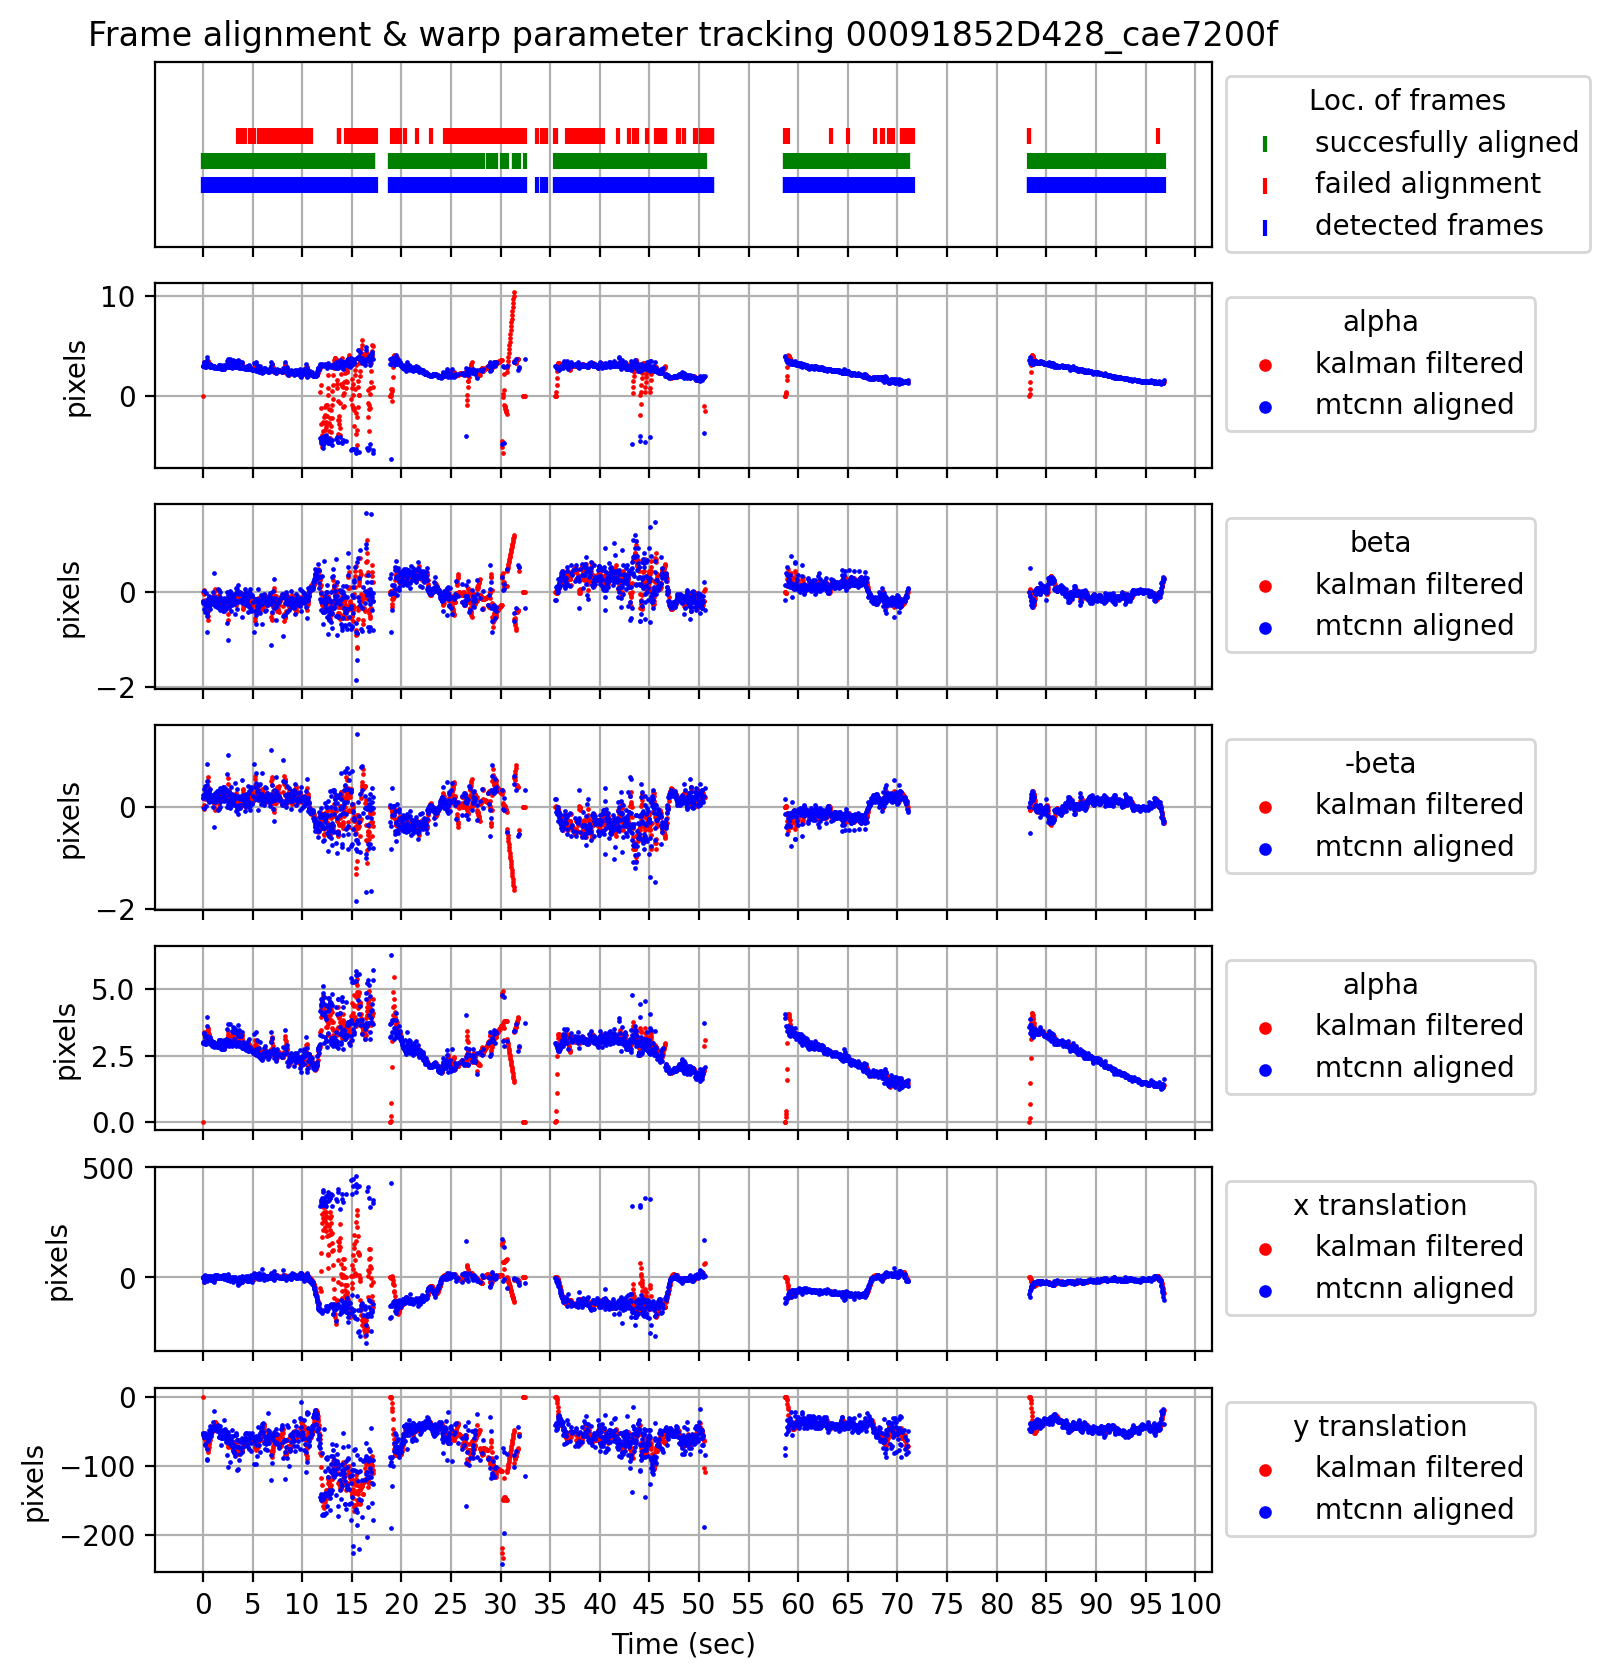

In [5]:
# combined figure
fig_combined = plt.figure(facecolor='white', dpi=dpi, figsize=(15, 10))

ax = plt.subplot(721)
ax.set_axisbelow(True)

offset = 0.01

plt.scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
plt.scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
plt.scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
plt.ylim([-0.025, 0.05])
plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=1,
          title='Loc. of frames')
plt.xticks(range(0, 101, 5))
ax.set_xticklabels([])
plt.yticks([])
plt.title('Frame alignment & warp parameter tracking 00091852D428_cae7200f')
plt.grid()

# start on the warp params
param_names = ['alpha', 'beta', '-beta', 'alpha', 'x translation', 'y translation']
for ii in range(0, 6):
    ax2 = plt.subplot(7, 2, ii*2 + 3)
    ax2.set_axisbelow(True)
    plt.scatter(np.arange(0, kalman_filtered_warp.estimated_signal.shape[1]-1)[
        detected_and_gap_filtered_frames] / 30,
                kalman_filtered_warp.estimated_signal.transpose()[:, ii][
                    detected_and_gap_filtered_frames], s=0.5,
                            color='r',
                  label='kalman filtered')
    plt.scatter(np.asarray(original_frame_nums)/30,
                original_warp_params[:, ii], s=0.5, color='b', label='mtcnn aligned')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=5,
              title=param_names[ii])
    plt.xticks(range(0, 101, 5))
    if ii is not 5:
        ax2.set_xticklabels([])
    plt.grid()
    plt.ylabel('pixels')

plt.xlabel('Time (sec)')


Text(0.5, 0, 'Time (sec)')

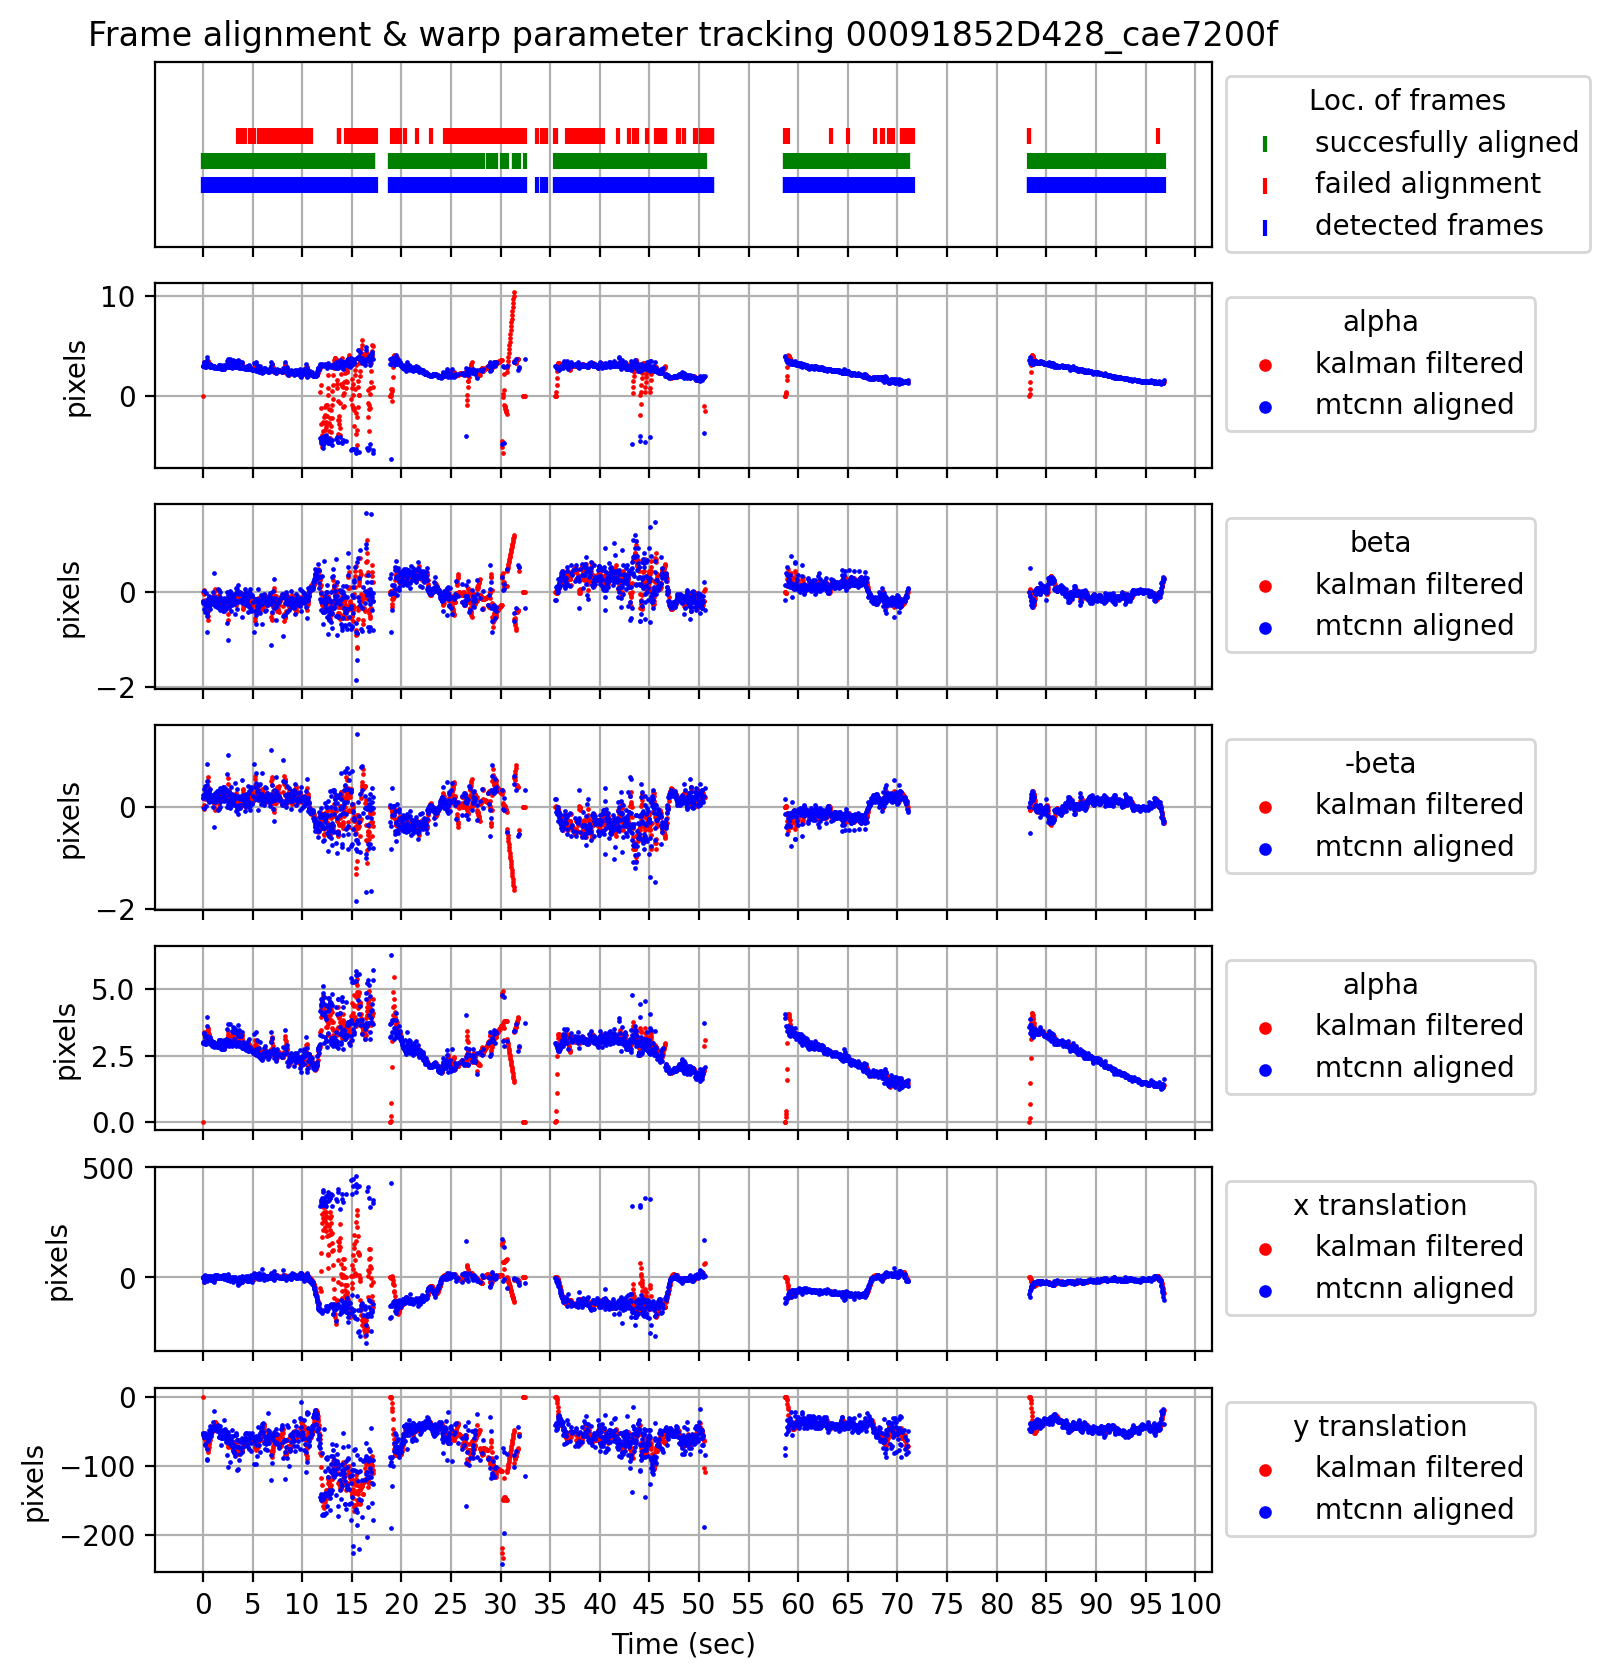

In [6]:
# combined figure, short version with only 1 alpha and beta
fig_combined = plt.figure(facecolor='white', dpi=dpi, figsize=(15, 10))

ax = plt.subplot(721)
ax.set_axisbelow(True)

offset = 0.01

plt.scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
plt.scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
plt.scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
plt.ylim([-0.025, 0.05])
plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=1,
          title='Loc. of frames')
plt.xticks(range(0, 101, 5))
ax.set_xticklabels([])
plt.yticks([])
plt.title('Frame alignment & warp parameter tracking 00091852D428_cae7200f')
plt.grid()

# start on the warp params
param_names = ['alpha', 'beta', '-beta', 'alpha', 'x translation', 'y translation']
for ii in range(0, 6):
    ax2 = plt.subplot(7, 2, ii*2 + 3)
    ax2.set_axisbelow(True)
    plt.scatter(np.arange(0, kalman_filtered_warp.estimated_signal.shape[1]-1)[
        detected_and_gap_filtered_frames] / 30,
                kalman_filtered_warp.estimated_signal.transpose()[:, ii][
                    detected_and_gap_filtered_frames], s=0.5,
                            color='r',
                  label='kalman filtered')
    plt.scatter(np.asarray(original_frame_nums)/30,
                original_warp_params[:, ii], s=0.5, color='b', label='mtcnn aligned')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=5,
              title=param_names[ii])
    plt.xticks(range(0, 101, 5))
    if ii is not 5:
        ax2.set_xticklabels([])
    plt.grid()
    plt.ylabel('pixels')

plt.xlabel('Time (sec)')
# fig_combined.tight_layout()

In [7]:
num_aligned_frames_kalman = len(detected_and_gap_filtered_frames)

In [8]:
percent_aligned_kalman = num_aligned_frames_kalman / len(detected_frame_nums)
percent_aligned_mtcnn = len(original_frame_nums) / len(detected_frame_nums)

In [9]:
print(f"Kalman aligned: {percent_aligned_kalman:.2%}")
print(f"MTCNN aligned:  {percent_aligned_mtcnn:.2%}")

Kalman aligned: 97.37%
MTCNN aligned:  81.30%


In [12]:
missed_frame_nums

[105,
 114,
 115,
 118,
 126,
 141,
 145,
 147,
 150,
 152,
 153,
 154,
 170,
 178,
 181,
 184,
 190,
 202,
 203,
 207,
 215,
 218,
 219,
 225,
 226,
 227,
 228,
 232,
 233,
 234,
 235,
 236,
 240,
 241,
 245,
 246,
 248,
 253,
 256,
 258,
 259,
 261,
 265,
 268,
 271,
 277,
 279,
 280,
 286,
 287,
 290,
 291,
 292,
 301,
 303,
 306,
 308,
 310,
 313,
 323,
 327,
 410,
 411,
 412,
 433,
 435,
 442,
 444,
 445,
 457,
 460,
 461,
 469,
 472,
 474,
 478,
 479,
 480,
 483,
 485,
 486,
 487,
 488,
 489,
 500,
 511,
 524,
 572,
 575,
 576,
 578,
 589,
 597,
 611,
 648,
 691,
 731,
 737,
 747,
 749,
 753,
 754,
 755,
 756,
 757,
 758,
 760,
 761,
 764,
 765,
 767,
 768,
 769,
 770,
 771,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 785,
 786,
 787,
 789,
 790,
 791,
 797,
 798,
 801,
 804,
 805,
 807,
 808,
 809,
 810,
 811,
 813,
 814,
 819,
 820,
 822,
 825,
 826,
 827,
 830,
 831,
 832,
 833,
 834,
 835,
 836,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 846,
 848,
 849,
 850

In [11]:
105 in detected_frame_nums

True